# Factors influencing when people cycle

## Prepare workstation and import files

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data files
biking_sites_london = pd.read_excel("Biking sites.xlsx")
central_london = pd.read_csv("Central London.csv")
inner_london = pd.read_csv("Inner London.csv")
outer_london = pd.read_csv("Outer London.csv")

C:\Users\mhbil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\mhbil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Explore raw data

### Central London

In [3]:
print(central_london.shape)

(1048366, 17)


In [4]:
print(central_london.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048366 entries, 0 to 1048365
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Survey wave (calendar quarter)  758163 non-null  object 
 1   Equivalent financial quarter    758163 non-null  object 
 2   Site ID                         758163 non-null  object 
 3   Location                        758163 non-null  object 
 4   Survey date                     748007 non-null  object 
 5   Weather                         746329 non-null  object 
 6   Time                            758163 non-null  object 
 7   Period                          758163 non-null  object 
 8   Direction                       758163 non-null  object 
 9   Start hour                      758163 non-null  float64
 10  Start minute                    758163 non-null  float64
 11  Number of private cycles        758099 non-null  float64
 12  Number of cycl

In [5]:
print(central_london.head())

  Survey wave (calendar quarter) Equivalent financial quarter   Site ID  \
0        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
1        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
2        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
3        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
4        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   

                             Location    Survey date Weather         Time  \
0  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0600 - 0615   
1  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0615 - 0630   
2  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0630 - 0645   
3  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0645 - 0700   
4  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0700 - 0715   

                        Period   Direction  Start hour  Start minute  \
0  Early Morni

In [6]:
print(central_london.describe())

          Start hour   Start minute  Number of private cycles  \
count  758163.000000  758163.000000             758099.000000   
mean       13.499259      22.499951                 14.824374   
std         4.609643      16.770530                 26.255858   
min         6.000000       0.000000                  0.000000   
25%         9.000000       0.000000                  2.000000   
50%        13.000000      15.000000                  7.000000   
75%        17.000000      30.000000                 16.000000   
max        21.000000      45.000000               1177.000000   

       Number of cycle hire bikes   Total cycles  Unnamed: 14  Unnamed: 15  \
count               758099.000000  758163.000000          0.0          0.0   
mean                     1.830072      16.653040          NaN          NaN   
std                      3.321560      28.675116          NaN          NaN   
min                      0.000000       0.000000          NaN          NaN   
25%                     

Observations: Central London contains info on the **date** ('Survey wave (calendar quarter)', 'Equivalent financial quarter', 'Survey Date'), **time** ('Time', 'Period', 'Start hour', 'Start minute'), **location** ('Site ID', 'Location'), **weather** ('Weather'), **direction of travel** ('Direction'), and **number of cycles** ('Number of private cycles', 'Number of cycle hire bikes', 'Total cycles'). 'Unnamed: 14' , 'Unnamed: 15', and 'Unnamed: 16' can be removed since they contain empty values. There are missing values for 'Survey date,' 'Weather,' 'Number of private cycles,' and 'Number of cycle hire bikes.'

### Inner London

In [7]:
print(inner_london.shape)

(615168, 13)


In [8]:
print(inner_london.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615168 entries, 0 to 615167
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Survey wave (year)          523776 non-null  float64
 1   Site ID                     523776 non-null  object 
 2   Location                    523776 non-null  object 
 3   Survey date                 521024 non-null  object 
 4   Weather                     519102 non-null  object 
 5   Time                        523770 non-null  object 
 6   Period                      523770 non-null  object 
 7   Direction                   523776 non-null  object 
 8   Start hour                  523770 non-null  float64
 9   Start minute                523770 non-null  float64
 10  Number of private cycles    523776 non-null  float64
 11  Number of cycle hire bikes  523776 non-null  float64
 12  Total cycles                523776 non-null  float64
dtypes: float64(6),

In [9]:
print(inner_london.head())

   Survey wave (year)   Site ID    Location    Survey date Weather  \
0              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
1              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
2              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
3              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
4              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound         6.0   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound         6.0   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound         6.0   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound         6.0   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound         7.0   

   Start minute  Number of private cycles  Number of cycle hire bikes  \
0           0.0                       1.0                         0.0   
1     

In [10]:
print(inner_london.describe())

       Survey wave (year)     Start hour   Start minute  \
count       523776.000000  523770.000000  523770.000000   
mean          2017.986070      13.499914      22.499914   
std              2.035381       4.609733      16.770551   
min           2015.000000       6.000000       0.000000   
25%           2016.000000       9.000000       0.000000   
50%           2018.000000      13.000000      15.000000   
75%           2020.000000      17.000000      30.000000   
max           2021.000000      21.000000      45.000000   

       Number of private cycles  Number of cycle hire bikes   Total cycles  
count             523776.000000               523776.000000  523776.000000  
mean                   5.929833                    0.267943       6.196408  
std                   10.937833                    0.944529      11.309639  
min                    0.000000                    0.000000       0.000000  
25%                    1.000000                    0.000000       1.000000  
50%   

Observations: Inner London contains info on the **date** ('Survey wave (year)','Survey Date'), **time** ('Time', 'Period', 'Start hour', 'Start minute'), **location** ('Site ID', 'Location'), **weather** ('Weather'), **direction of travel** ('Direction'), and **number of cycles** ('Number of private cycles', 'Number of cycle hire bikes', 'Total cycles'). There are missing values for 'Survey date','Weather', 'Time', 'Period', 'Start hour', and 'Start minute'.

### Outer London

In [11]:
print(outer_london.shape)

(375660, 14)


In [12]:
print(outer_london.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375660 entries, 0 to 375659
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Survey wave (year)        375660 non-null  int64 
 1   Site ID                   375660 non-null  object
 2   Location                  375660 non-null  object
 3   Survey date               374492 non-null  object
 4   Weather                   374692 non-null  object
 5   Time                      375660 non-null  object
 6   Period                    375660 non-null  object
 7   Direction                 375660 non-null  object
 8   Start hour                375660 non-null  int64 
 9   Start minute              375660 non-null  int64 
 10  Number of male cycles     375660 non-null  int64 
 11  Number of female cycles   375660 non-null  int64 
 12  Number of unknown cycles  375660 non-null  int64 
 13  Total cycles              375660 non-null  int64 
dtypes: i

In [13]:
print(outer_london.head())

   Survey wave (year)   Site ID          Location    Survey date Weather  \
0                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
1                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
2                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
3                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
4                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound           6   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound           6   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound           6   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound           6   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound           7   

   Start minute  Number of male cycles  Number of female cycles  \
0             0                      2           

In [14]:
print(outer_london.describe())

       Survey wave (year)     Start hour   Start minute  \
count       375660.000000  375660.000000  375660.000000   
mean          2017.848267      13.499643      22.499840   
std              1.993641       4.609639      16.770532   
min           2015.000000       6.000000       0.000000   
25%           2016.000000       9.000000       0.000000   
50%           2018.000000      13.000000      15.000000   
75%           2019.000000      17.000000      30.000000   
max           2021.000000      21.000000      45.000000   

       Number of male cycles  Number of female cycles  \
count          375660.000000            375660.000000   
mean                1.335207                 0.240646   
std                 2.701113                 0.751606   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 2.000000                 0.000000   
max         

Observations: Outer London contains info on the **date** ('Survey wave (year)','Survey Date'), **time** ('Time', 'Period', 'Start hour', 'Start minute'), **location** ('Site ID', 'Location'), **weather** ('Weather'), **direction of travel** ('Direction'), and **number of cycles** ('Number of male cycles', 'Number of female cycles', 'Number of unknown cycles', and 'Total cycles'). There are missing values for 'Survey date' and 'Weather.'

Overall London data observations: Central, Inner, and Outer London data frames have the following columns in common: **date** ('Survey Date'), **time** ('Time', 'Period', 'Start hour', 'Start minute'), **location** ('Site ID', 'Location'), **weather** ('Weather'), **direction of travel** ('Direction'), and **number of cycles** ('Total cycles').

## Concatenate and clean data

In [15]:
# Concatente data and reset index
london_all = pd.concat([central_london, inner_london, outer_london], ignore_index = True)

In [16]:
# Examine shape of new data
print(london_all.shape)

(2039194, 21)


In [17]:
# Examine content of new data
print(london_all.head())

  Survey wave (calendar quarter) Equivalent financial quarter   Site ID  \
0        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
1        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
2        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
3        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
4        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   

                             Location    Survey date Weather         Time  \
0  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0600 - 0615   
1  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0615 - 0630   
2  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0630 - 0645   
3  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0645 - 0700   
4  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0700 - 0715   

                        Period   Direction  Start hour  ...  \
0  Early Morning (06:00

In [18]:
print(london_all.tail())

        Survey wave (calendar quarter) Equivalent financial quarter   Site ID  \
2039189                            NaN                          NaN  OUTCY451   
2039190                            NaN                          NaN  OUTCY451   
2039191                            NaN                          NaN  OUTCY451   
2039192                            NaN                          NaN  OUTCY451   
2039193                            NaN                          NaN  OUTCY451   

                             Location    Survey date Weather         Time  \
2039189  Thames Path (Lower Ham Road)  ven, 18/06/21     Wet  2045 - 2100   
2039190  Thames Path (Lower Ham Road)  ven, 18/06/21     Wet  2100 - 2115   
2039191  Thames Path (Lower Ham Road)  ven, 18/06/21     Wet  2115 - 2130   
2039192  Thames Path (Lower Ham Road)  ven, 18/06/21     Wet  2130 - 2145   
2039193  Thames Path (Lower Ham Road)  ven, 18/06/21     Wet  2145 - 2200   

                        Period   Direction  Start 

In [19]:
print(london_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039194 entries, 0 to 2039193
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Survey wave (calendar quarter)  object 
 1   Equivalent financial quarter    object 
 2   Site ID                         object 
 3   Location                        object 
 4   Survey date                     object 
 5   Weather                         object 
 6   Time                            object 
 7   Period                          object 
 8   Direction                       object 
 9   Start hour                      float64
 10  Start minute                    float64
 11  Number of private cycles        float64
 12  Number of cycle hire bikes      float64
 13  Total cycles                    float64
 14  Unnamed: 14                     float64
 15  Unnamed: 15                     float64
 16  Unnamed: 16                     float64
 17  Survey wave (year)         

In [20]:
# Drop unneeded columns
london_clean = london_all.drop(['Survey wave (calendar quarter)', 'Equivalent financial quarter', 'Number of private cycles',
                'Number of cycle hire bikes', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Survey wave (year)',
                'Number of male cycles', 'Number of female cycles', 'Number of unknown cycles'], axis=1)

In [21]:
# Create Month column
london_clean['Month'] = london_clean['Survey date'].str.split('/').str[1]

In [22]:
# Create Year column
london_clean['Year'] = london_clean['Survey date'].str.split('/').str[2]

In [23]:
# Check that new columns were added
london_clean.head()

,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Total cycles,Month,Year
0,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,01,14
1,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,01,14
2,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,01,14
3,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,61.0,01,14
4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,01,14


In [24]:
# Check Month values
london_clean['Month'].value_counts()

06    342097
05    322130
07    197446
04    187294
09    116110
10     91949
11     77933
01     71934
08     69880
03     58696
12     55862
02     51936
Name: Month, dtype: int64

In [25]:
# Check Year values
london_clean['Year'].value_counts()

19    240432
18    239060
17    235052
16    235008
15    234292
21    226515
20    130368
14    102540
Name: Year, dtype: int64

In [26]:
# Check missing Month and Year values
print(f"Number of missing values for Survey date: {london_clean['Survey date'].isnull().sum()}")
print(f"Number of missing values for Month: {london_clean['Month'].isnull().sum()}")
print(f"Number of missing values for Year: {london_clean['Year'].isnull().sum()}")

Number of missing values for Survey date: 395671
Number of missing values for Month: 395927
Number of missing values for Year: 395927


In [27]:
# Examine what Survey date looks like when Month is missing but Survey date is not
sub_df = london_clean[london_clean['Month'].isnull() & ~ london_clean['Survey date'].isnull()]
print(sub_df['Survey date'])

654784     
654785     
654786     
654787     
654788     
         ..
664251     
664252     
664253     
664254     
664255     
Name: Survey date, Length: 256, dtype: object


Observation: There are 256 values where Survey date is not formatted properly. Given the large size of the overall data set, we will ignore these values.

In [28]:
# Check Month and Year dtype
london_clean.dtypes

Site ID          object
Location         object
Survey date      object
Weather          object
Time             object
Period           object
Direction        object
Start hour      float64
Start minute    float64
Total cycles    float64
Month            object
Year             object
dtype: object

In [29]:
# Change Month and Year dtype to float
london_clean['Month'] = london_clean['Month'].astype(float)
london_clean['Year'] = london_clean['Year'].astype(float)
print(london_clean.dtypes)

Site ID          object
Location         object
Survey date      object
Weather          object
Time             object
Period           object
Direction        object
Start hour      float64
Start minute    float64
Total cycles    float64
Month           float64
Year            float64
dtype: object


In [30]:
# Create Season column

# Create a list of conditions
conditions = [
    (london_clean['Month'] > 2) & (london_clean['Month'] <= 5),
    (london_clean['Month'] == 12) | (london_clean['Month'] <= 2),
    (london_clean['Month'] > 8) & (london_clean['Month'] <= 11),
    (london_clean['Month'] > 5) & (london_clean['Month'] <= 8)
]

# Create a list of values to assign for each condition
values = ['Spring', 'Winter', 'Autumn', 'Summer']

# Create new 'Seasons' column and use np.select to assign values to it
london_clean['Season'] = np.select(conditions, values)

# Display updated DataFrame
print(london_clean.Season.value_counts())
print(london_clean.head())
print(london_clean.tail())

Summer    609423
Spring    568120
0         395927
Autumn    285992
Winter    179732
Name: Season, dtype: int64
    Site ID                            Location    Survey date Weather  \
0  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
1  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
2  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
3  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   
4  CENCY001  Millbank (south of Thorney Street)  ven, 24/01/14     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound         6.0   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound         6.0   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound         6.0   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound         6.0   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound         7.0   

   Start minute 

In [31]:
# There are 395327 values of 0 for 'Season.' Check that season was applied to all applicable values
print(f"Number of missing values for Month: {london_clean['Month'].isnull().sum()}")

Number of missing values for Month: 395927


### Examine values of columns of interest

In [32]:
# View all rows
pd.set_option('display.max_rows', None)

In [33]:
# Values for 'Weather'
london_clean['Weather'].value_counts()

Dry                                1378499
Wet                                 175489
Fine                                 21786
Sunny                                11952
Cloudy                               10366
Rain                                  9032
N/a                                   2560
Drizzle                               1600
D                                     1440
Dry/sunny                             1378
Light Rain                            1068
Fair                                  1020
Damp                                   789
Unknown                                768
Cold                                   684
Dry/wet                                666
Wet/dry                                656
Windy                                  534
Dry & Sunny                            446
Clear and Warm                         432
Wet                                    408
Cold/rain                              384
Showers                                376
Wet Road   

In [34]:
# Export 'Weather' values to csv
weather = london_clean['Weather'].value_counts()

weather.to_csv('C:/Users/mhbil/OneDrive/Desktop/LSE Employer Project/weather.csv')

In [35]:
# Values for 'Period'
london_clean['Period'].value_counts()

Inter-peak (10:00-16:00)       621642
AM peak (07:00-10:00)          310824
PM peak (16:00-19:00)          310781
Evening (19:00-22:00)          310738
Early Morning (06:00-07:00)    103608
Name: Period, dtype: int64

In [36]:
# Values for 'Season'
london_clean['Season'].value_counts()

Summer    609423
Spring    568120
0         395927
Autumn    285992
Winter    179732
Name: Season, dtype: int64

## Exploratory Data Analysis

In [37]:
# Subset Season to exclude values of 0
london_clean_season = london_clean[london_clean['Season'] != '0']

<AxesSubplot:xlabel='Season', ylabel='Total cycles'>

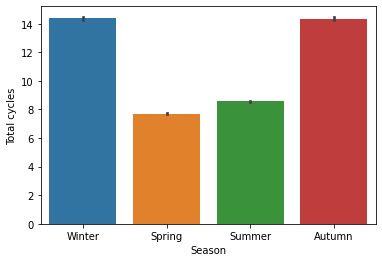

In [38]:
# Examine relationship between number of cycles and season - barplot
sns.barplot(x='Season', y='Total cycles', data = london_clean_season)

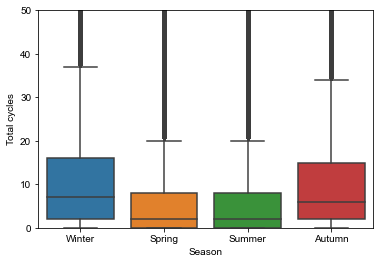

In [39]:
# Examine relationship between number of cycles and season - boxplot
sns.boxplot(x='Season', y='Total cycles', data=london_clean_season)
plt.ylim(0, 50)
sns.set(rc = {'figure.figsize':(15,15)})

<AxesSubplot:xlabel='Month', ylabel='Total cycles'>

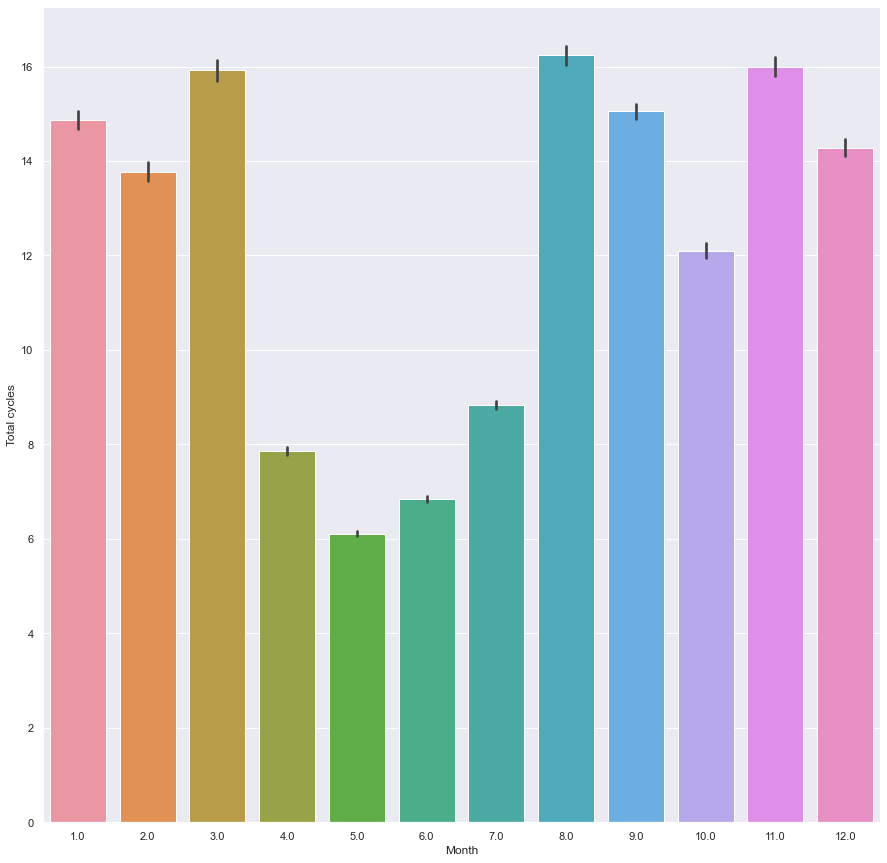

In [40]:
# Examine relationship between number of cycles and month - barplot
sns.barplot(x='Month', y='Total cycles', data= london_clean)

In [41]:
# Subset data to exclude 2020
london_clean_prepandemic = london_clean[london_clean['Year'] < 20]
london_clean_prepandemic['Year'].value_counts()

19.0    240432
18.0    239060
17.0    235052
16.0    235008
15.0    234292
14.0    102540
Name: Year, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Total cycles'>

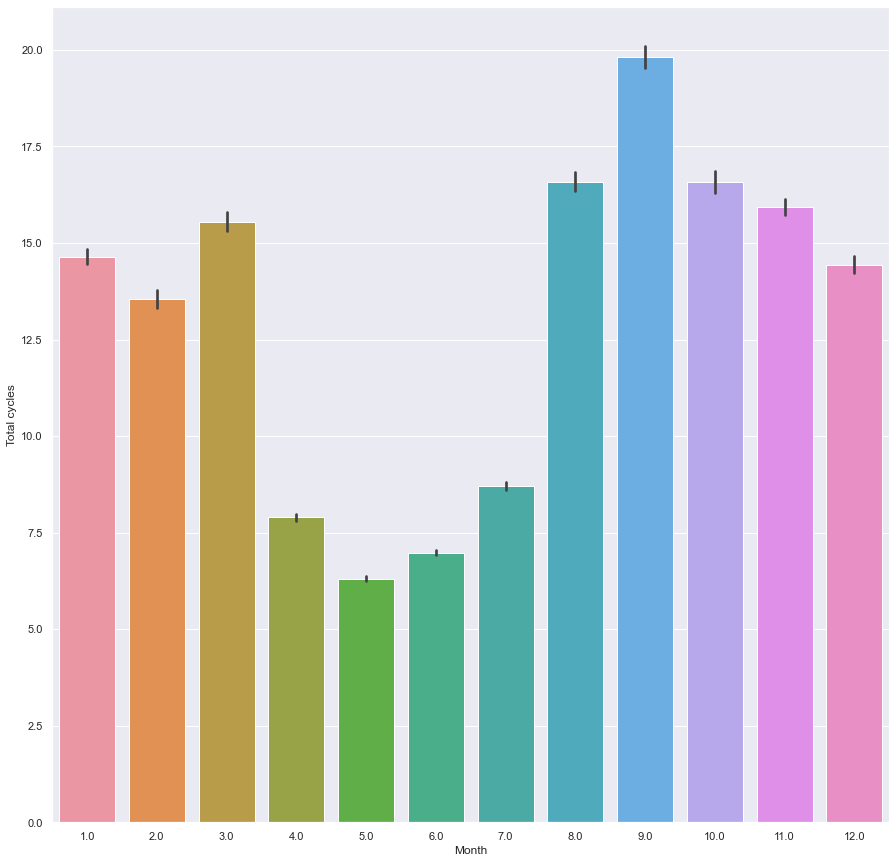

In [42]:
# Examine relatinship between number of cycles and months with 2020 and 2021 excluded - barplot
sns.barplot(x='Month', y='Total cycles', data= london_clean_prepandemic)

<AxesSubplot:xlabel='Period', ylabel='Total cycles'>

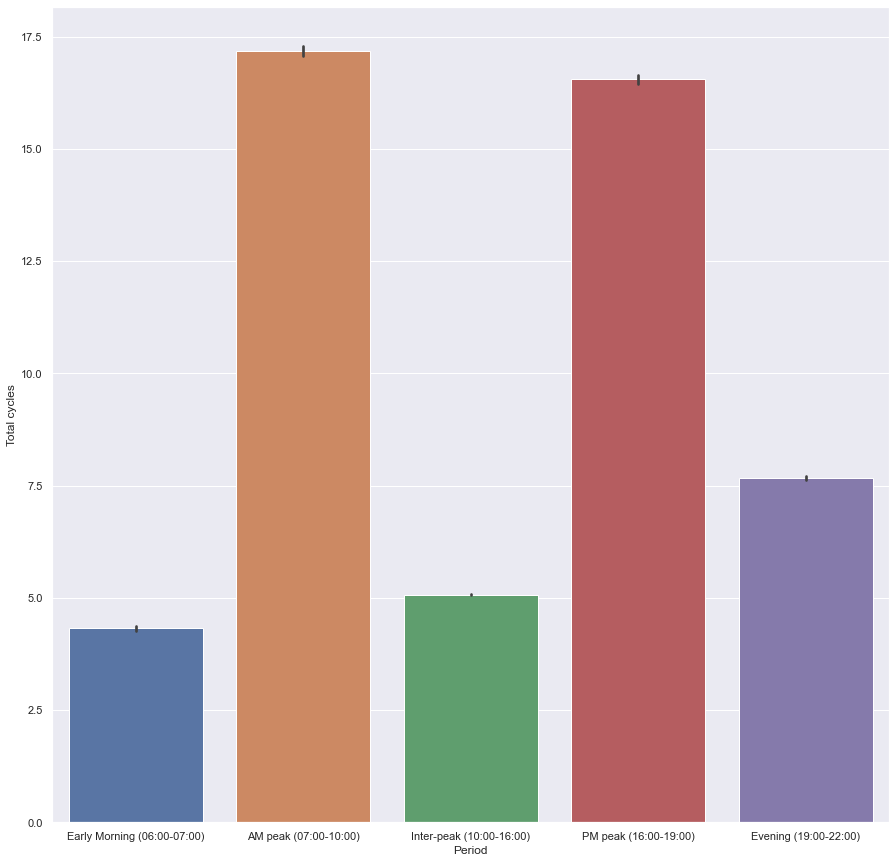

In [43]:
# Examine relationship between number of cycles and time of day - barplot
sns.barplot(x="Period", y="Total cycles", data=london_clean)

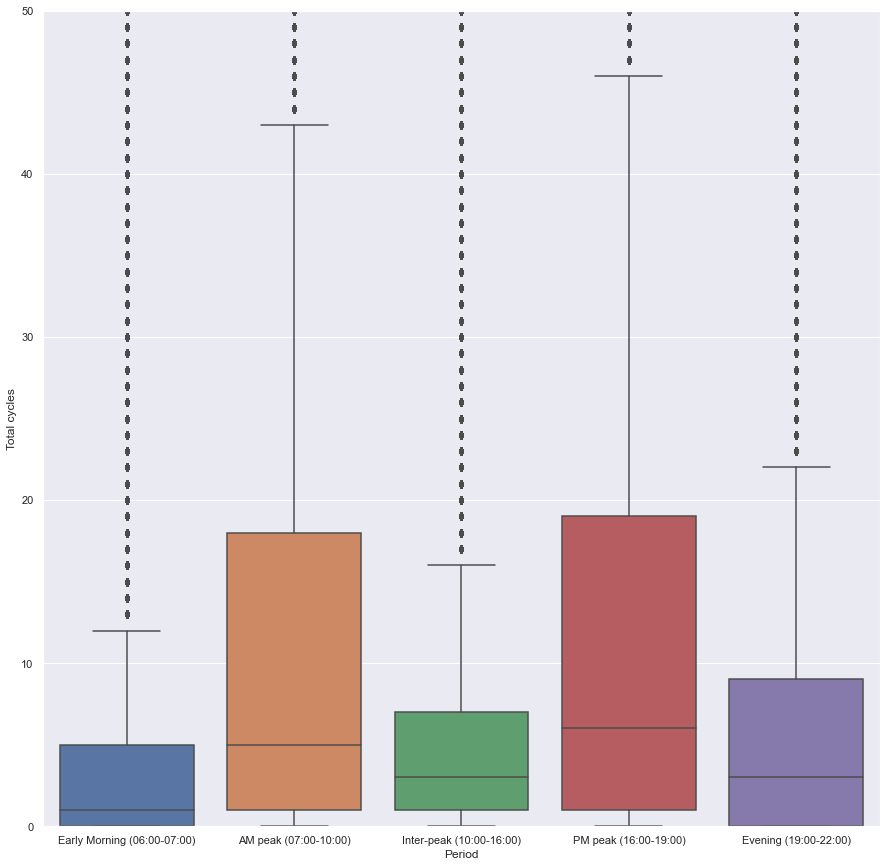

In [44]:
# Examine relationship between number of cycles and time of day
sns.boxplot(x='Period', y='Total cycles', data=london_clean)
plt.ylim(0,50)
sns.set(rc = {'figure.figsize':(15,15)})

In [45]:
# Subset data based on top weather conditions
london_clean_topweather = london_clean[london_clean['Weather'].isin(['Dry', 'Wet', 'Fine', 'Sunny', 'Cloudy', 'Rain'])]

<AxesSubplot:xlabel='Weather', ylabel='Total cycles'>

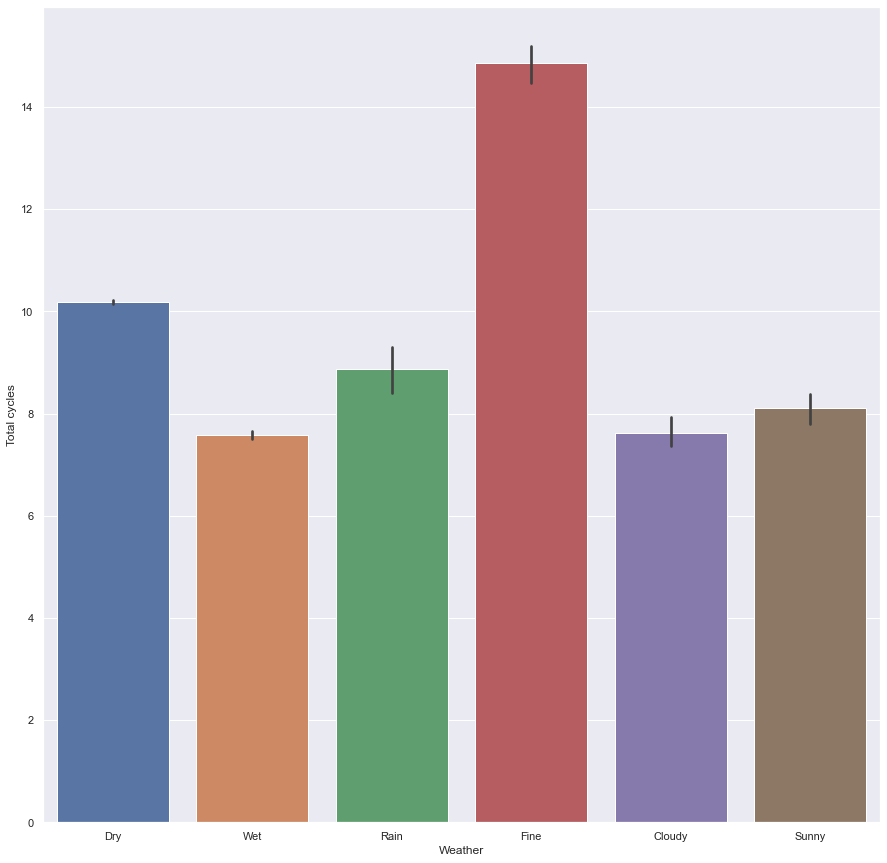

In [46]:
# Examine relationship between total cycles and top weather conditions
sns.barplot(x='Weather', y='Total cycles', data=london_clean_topweather)

<AxesSubplot:xlabel='Month', ylabel='Total cycles'>

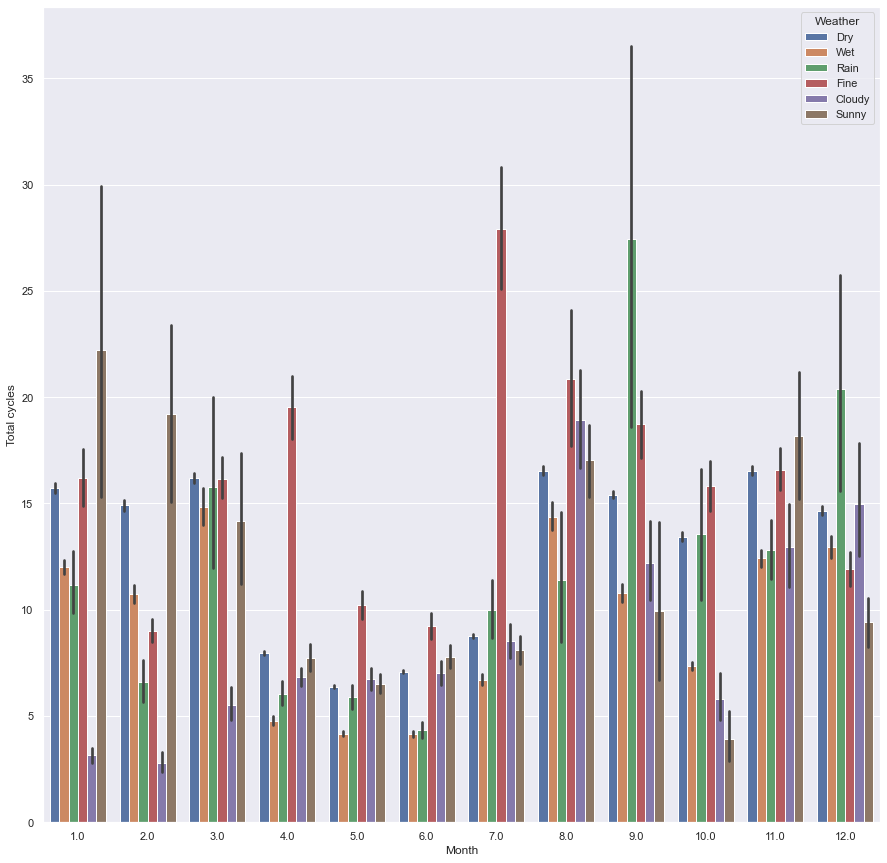

In [52]:
# Examine relationship between top weather conditions and month
sns.barplot(x='Month', y='Total cycles', hue='Weather', data=london_clean_topweather)